<span style="font-size:30px">**Filtros de dominio espacial, parte 2: Filtro gaussiano.**</span> 
    
<span style="font-family: 'Verdana'; color: red;"> *Bronquivoide* </span>

# Introducción:

### En la primera parte de esta serie de notebooks abordamos la ecuación que describía analíticamente a una imagen degradada $ g(x,y)$:

<font size="5"> $ g(x,y)=h(x,y)\diamond f(x,y)+\eta (x,y)$</font>

### En donde $h(x,y)$ es el kernel asociado al operador convolución, $ \diamond$, que corresponde a la representación espacial del operador de degradación; $f(x,y)$ es la imagen original o ideal y $\eta (x,y)$ es el ruido aditivo.

### Vimos también que la aplicación de un filtro que pretende restaurar la imagen degradada está representada por la siguiente ecuación:

<font size="5"> $ T[g(x,y)]=\hat{f}(x,y)$</font>

### En el caso de un filtro gaussiano se define el kernel $h(x,y)$ como una función gaussiana bidimensional:

<font size="5"> $ G(x,y)=exp(\frac{-x^2 +y^2}{2 \sigma ^2})=h(x,y)$</font>

### Por lo que tenemos que:

<font size="5"> $ g(x,y)=G(x,y)\diamond f(x,y)+\eta (x,y)$</font>

### Además, para este filtro gaussiano, definimos la transformación que opera un filtro sobre la imagen degradada como:

<font size="5"> $ \hat{f}(x,y)=T[g(x,y)]=G(x,y)\diamond g(x,y)$</font>

### El filtro gaussiano es usado para eliminar ruido gaussiano, es decir, un ruido cuya función de densidad de probabilidad es una distribución normal:

<font size="5"> $ P(z)= \frac{1}{\sqrt{2 \pi \sigma}} exp(\frac{-(z-\overline{z})^2}{2\sigma ^2})$</font>

### En donde $z$ es la variable intensidad de pixeles y $\sigma ^2$ es la varianza de $z$.

# Ejercicio:

### Implementar un filtro gaussiano a la imagen *Lena.tif* con OpenCV. Para generar la imagen corrompida vamos a usar la función *cv2.randn* que genera un arreglo de datos aleatorios de una distribución gaussiana que representarán al ruido.

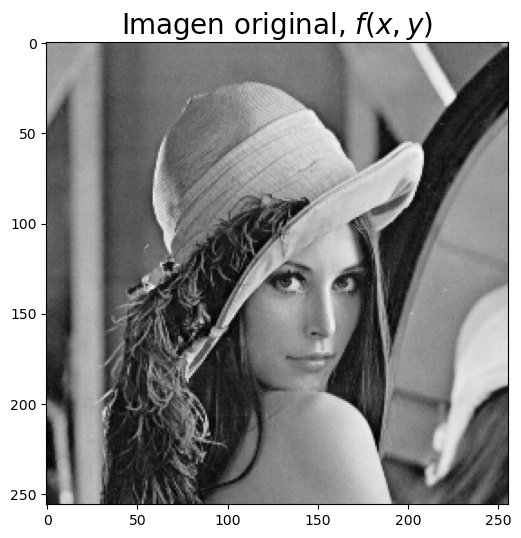

El tamaño de la imagen es: (256, 256)
Con esto nos aseguramos de que se tenga el mismo orden para la imagen y el arreglo: (256, 256) = (256, 256)
El arreglo asociado al ruido es:
 [[ 0  0  0 ...  0  0  0]
 [ 0  5  0 ...  0 18  0]
 [ 0 10  0 ...  0  0  0]
 ...
 [ 0  0 12 ...  1 23  0]
 [ 0  9  0 ...  0 14  5]
 [ 0  0  0 ...  0 10 13]]


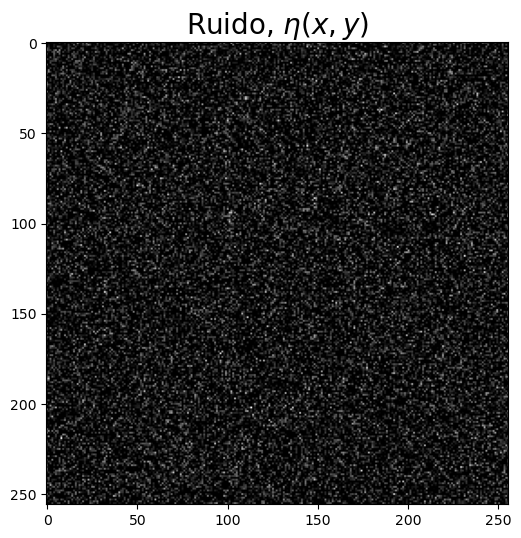

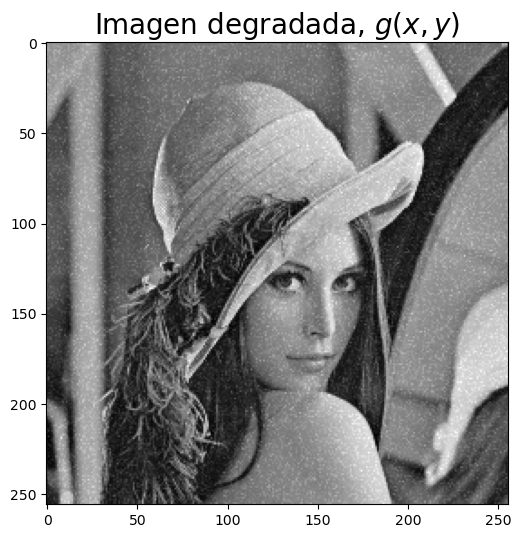

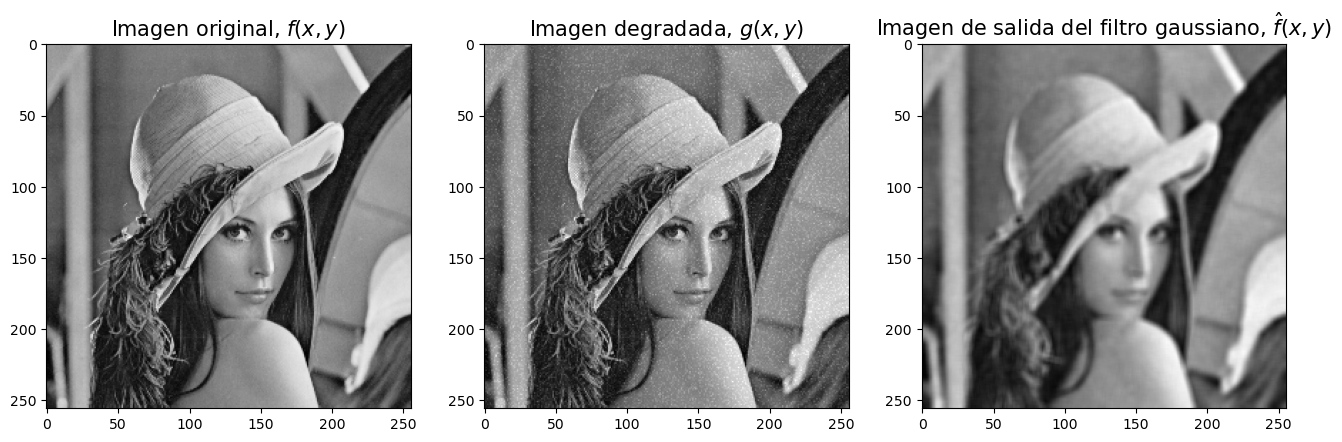

In [20]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

#Display de imagen:
imagen_original=cv2.imread('Lena.tif', 0)
plt.figure(figsize=(12,6))
plt.imshow(imagen_original, cmap = 'gray')
plt.title(r"Imagen original, $f(x,y)$",fontsize=20)
plt.show()

#Generando el ruido:
print(f"El tamaño de la imagen es: {imagen_original.shape}")
arreglo=np.zeros(imagen_original.shape, np.uint8)
print(f"Con esto nos aseguramos de que se tenga el mismo orden para la imagen y el arreglo: {arreglo.shape} = {imagen_original.shape}")
ruido=cv2.randn(arreglo, mean = 0, stddev = 15)
print(f"El arreglo asociado al ruido es:\n {ruido}")
plt.figure(figsize=(12,6))
plt.imshow(ruido, cmap = 'gray')
plt.title(r"Ruido, $\eta (x,y)$",fontsize=20)
plt.show()

#Generando la imagen degradada por ruido:
imagen_corrompida=cv2.add(imagen_original, ruido) #Operación aritmética entre arreglos. Se suman las entradas.
plt.figure(figsize=(12,6))
plt.imshow(imagen_corrompida, cmap = 'gray')
plt.title(r"Imagen degradada, $g(x,y)$",fontsize=20)
plt.show()

#Filtro gaussiano:
gaussiano=cv2.GaussianBlur(imagen_corrompida, (5,5), 15)
plt.figure(figsize=(16,9))
plt.subplot(1,3,1)
plt.imshow(imagen_original, cmap = 'gray')
plt.title("Imagen original, $f(x,y)$", fontsize = 15)
plt.subplot(1,3,2)
plt.imshow(imagen_corrompida, cmap = 'gray')
plt.title("Imagen degradada, $g(x,y)$", fontsize = 15)
plt.subplot(1,3,3)
plt.imshow(gaussiano, cmap = 'gray')
plt.title(r"Imagen de salida del filtro gaussiano, $\hat{f} (x,y)$", fontsize = 15)
plt.show()

# Fin del ejercicio:
### Bibliografía recomendada:

### $\blacksquare$ Gonzalez, R. C., & Woods, R. E. (2008). Digital image processing (3rd ed.). Pearson.

### $\blacksquare$ Acharya, T., & Ray, A. K. (2005). Image processing: Principles and applications. Wiley-Interscience.